In [ ]:
#unzip the dataset
!unzip -q "/content/Group_Project_Data 2.zip"

replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


link for google drive: https://colab.research.google.com/drive/150P0uJXeX2DWWNjlp5pMwiYz3Vbs9iPm?usp=sharing#scrollTo=N1L4SL1vEZYc

In [ ]:
#importing the required libs
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2

In [ ]:
#giving the path of dataset.
data_dir= '/content/Group_Project_Data'

Real images in training set


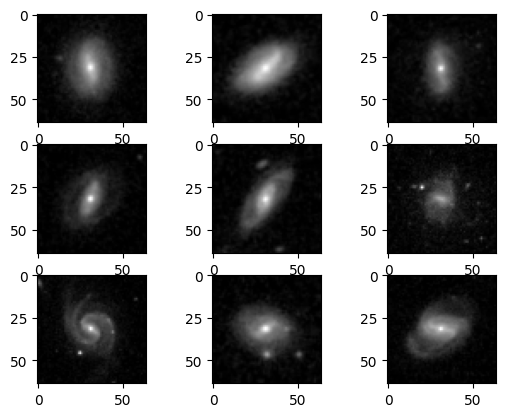

In [ ]:
#plotting samples of dataset from training set which are real images
all_files=os.listdir(data_dir+"/Train/Real")
data_path = [os.path.join(data_dir + "/Train/Real/" + i) for i in all_files]
k=0
print('Real images in training set')
for i in data_path:
  k=k+1
  plt.subplot(3,3,k) 
  plt.imshow(cv2.imread(i,1))
  if k == 9:
        break
plt.show()

Fake images in training set


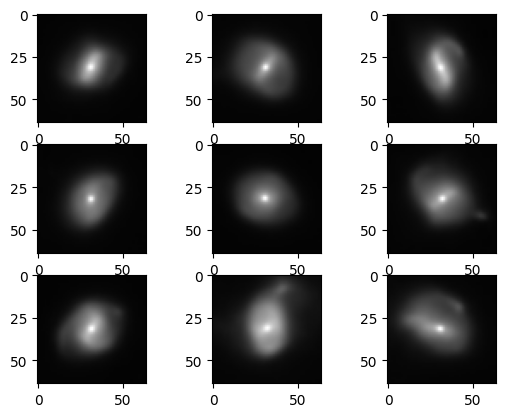

In [ ]:
#plotting samples of dataset from training set which are fake images
all_files=os.listdir(data_dir+"/Train/Fake")
data_path = [os.path.join(data_dir + "/Train/Fake/" + i) for i in all_files]
k=0
print('Fake images in training set')
for i in data_path:
  k=k+1
  plt.subplot(3,3,k) 
  plt.imshow(cv2.imread(i,1))
  if k == 9:
        break
plt.show()

In [ ]:
#defining a function for median filter which window size of 3 so that it can be used in data pipeline along with image augumentation.
def median_filter(image):
    median = cv2.medianBlur(image, 3)
    return median

In [ ]:
#creating a data generator object for training dataset which rotation range parameter of 45 and preprocressing parameter which takes median filter function as input.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rotation_range=45,
        preprocessing_function=median_filter)

In [ ]:
# creating a data pipeline for loading the data while training of the model.
#path of train dataset is given, as the size of image are 64*64, batch size 32 so that 32 images are loaded while training and class mode is binary as it is binary classifcation.
train_generator = train_datagen.flow_from_directory(
        data_dir+'/Train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 6000 images belonging to 2 classes.


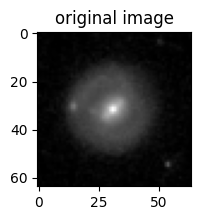

Image Augumentation


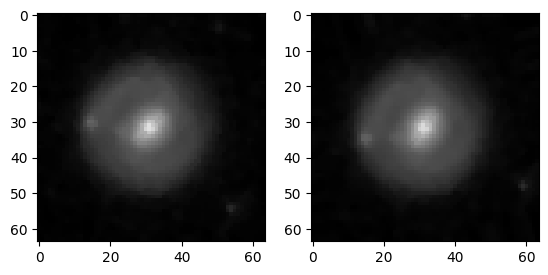

In [ ]:
#plotting some augumentated images.
plt.figure(figsize=(2,2))
plt.imshow(cv2.imread(data_dir+"/Train/Real/img_0.png",1))
plt.title("original image")
plt.show()

print("Image Augumentation")
import keras
img = tf.keras.utils.load_img(data_dir+"/Train/Real/img_0.png", target_size= (64,64))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
pic = train_datagen.flow(img_tensor, batch_size =1)
plt.figure(figsize=(10,8))
for i in range(1,3):
  plt.subplot(1, 3, i)
  batch = pic.next()
  image_ = batch[0].astype('uint8')
  plt.imshow(image_)
plt.show()

In [ ]:
#creating validation dataset pipeline.
valid_datagen = ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory(
        data_dir+'/Valid',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
#creating the CNN model.
CNN_model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32,2,activation='relu',padding='same',input_shape=(64,64,3)),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.AveragePooling2D(pool_size=2),
tf.keras.layers.Conv2D(16,2,activation='relu',padding='same'),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.AveragePooling2D(pool_size=2),
tf.keras.layers.Dropout(.2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(150,activation='relu'),
tf.keras.layers.Dense(1,activation='sigmoid')]
)

In [ ]:
#compling the CNN model.
CNN_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                        

In [ ]:
#training the CNN model.
history=CNN_model.fit(train_generator,validation_data=valid_generator,epochs=4)

Epoch 1/4
188/188 [==============================] - 18s 69ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.5866 - val_accuracy: 0.6705
Epoch 2/4
188/188 [==============================] - 12s 62ms/step - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.2629 - val_accuracy: 0.8845
Epoch 3/4
188/188 [==============================] - 11s 59ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.0041 - val_accuracy: 0.9975
Epoch 4/4
188/188 [==============================] - 11s 61ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0901 - val_accuracy: 0.9855


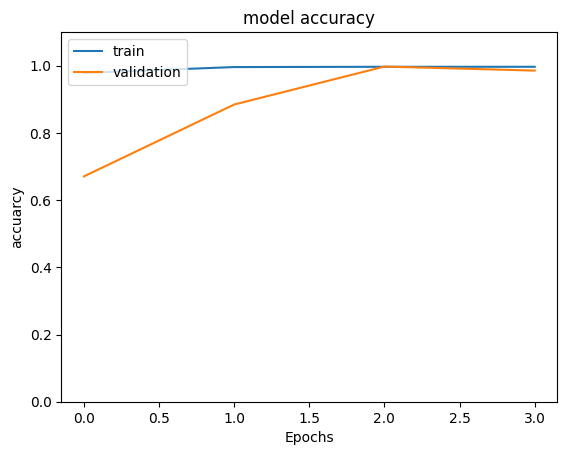

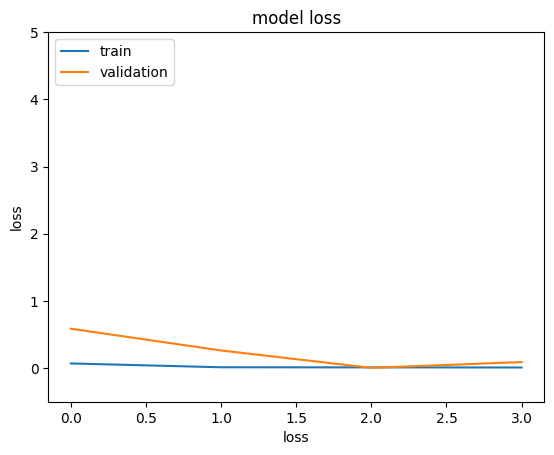

In [ ]:
#plotting the performance graphs of the model.
accuracy_training=history.history['accuracy']
accuracy_validation=history.history['val_accuracy']
plt.title('model accuracy')
plt.plot(accuracy_training)
plt.plot(accuracy_validation)
plt.xlabel('Epochs')
plt.ylabel('accuarcy')
plt.ylim([0, 1.1])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


loss_training=history.history['loss']
loss_validation=history.history['val_loss']
plt.title('model loss')
plt.plot(loss_training)
plt.plot(loss_validation)
plt.xlabel('loss')
plt.ylabel('loss')
plt.ylim([-.5, 5])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
#saving the model.
CNN_model.save('/content/Group_55_Model_Trained')

In [ ]:
#loading the saved model.
loaded_model = tf.keras.models.load_model('/content/Group_55_Model_Trained')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 32, 32, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                        

In [ ]:
#converting the model into zip.
!zip -r /content/Group_55_Model_Trained.zip /content/Group_55_Model_Trained

updating: content/Group_55_Model_Trained/ (stored 0%)
updating: content/Group_55_Model_Trained/keras_metadata.pb (deflated 91%)
updating: content/Group_55_Model_Trained/fingerprint.pb (stored 0%)
updating: content/Group_55_Model_Trained/assets/ (stored 0%)
updating: content/Group_55_Model_Trained/saved_model.pb (deflated 88%)
updating: content/Group_55_Model_Trained/variables/ (stored 0%)
updating: content/Group_55_Model_Trained/variables/variables.index (deflated 65%)
updating: content/Group_55_Model_Trained/variables/variables.data-00000-of-00001 (deflated 6%)
